In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [3]:
df1 = pd.read_csv('../data/dataset.csv')
df2 = pd.read_csv('../data/tas_dataset.csv')

display('df1','df2')

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251,1995,26,12,Sega Genesis,Platformer,NaN,Headgames,SEGA
1,X-Men 2: Clone Wars,Single-Character,X-Men 2: Clone Wars - Single-Character,1866,1995,26,8,Sega Genesis,Platformer,NaN,Headgames,SEGA
2,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,2125.85,2000,21,9,Dreamcast,3D Platformer,NaN,NaN,NaN
3,Kao the Kangaroo,100%,Kao the Kangaroo - 100%,4570.8,2000,21,2,Dreamcast,3D Platformer,NaN,NaN,NaN
4,Solitaire (NES),1 Card Draw,Solitaire (NES) - 1 Card Draw,78,1992,29,13,Nintendo Entertainment System,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3728,The Legend of Kage,1-Loop,The Legend of Kage - 1-Loop,408.417,1986,35,7,Nintendo Entertainment System,NaN,NaN,NaN,NaN
3729,The Legend of Kage,2-Loops,The Legend of Kage - 2-Loops,896,1986,35,1,Nintendo Entertainment System,NaN,NaN,NaN,NaN
3730,The Legend of Kage,Arcade,The Legend of Kage - Arcade,379.183,1986,35,1,Nintendo Entertainment System,NaN,NaN,NaN,NaN
3731,Dragon Fighter,Any%,Dragon Fighter - Any%,808,1990,31,9,Nintendo Entertainment System,NaN,NaN,NaN,NaN


In [11]:
dataset = pd.merge(df1,df2,on='game+category')
dataset.drop(['category_y','game_y'],axis=1,inplace=True)
dataset.rename(columns = {'category_x':'category','game_x':'game','TAS_time(seconds)':'TAS_time'},inplace=True)
dataset

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher,TAS_time
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251,1995,26,12,Sega Genesis,Platformer,NaN,Headgames,SEGA,958.99
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,2125.85,2000,21,9,Dreamcast,3D Platformer,NaN,NaN,NaN,852.30
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436,2003,18,11,Game Boy Advance,NaN,NaN,NaN,NaN,3559.35
3,Black Castle,Any%,Black Castle - Any%,512,2020,1,3,Game Boy Color,NaN,NaN,7FH,NaN,453.10
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797,1994,27,41,GameCube,Action,NaN,Sonic Team,SEGA,1704.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657,1987,34,33,Nintendo Entertainment System,NaN,NaN,NaN,NaN,575.42
592,Youkai Douchuuki,Any%,Youkai Douchuuki - Any%,599,2020,1,1,TurboGrafx-16/PC Engine,NaN,NaN,NaN,NaN,791.35
593,Totally Rad,Any%,Totally Rad - Any%,848,1991,30,4,Nintendo Entertainment System,NaN,NaN,NaN,NaN,727.57
594,Dragon Fighter,Any%,Dragon Fighter - Any%,808,1990,31,9,Nintendo Entertainment System,NaN,NaN,NaN,NaN,735.28


In [22]:
emulators = pd.read_csv('../data/tas_dataset2.csv')

display('dataset','emulators')

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher,TAS_time
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251,1995,26,12,Sega Genesis,Platformer,NaN,Headgames,SEGA,958.99
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,2125.85,2000,21,9,Dreamcast,3D Platformer,NaN,NaN,NaN,852.30
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436,2003,18,11,Game Boy Advance,NaN,NaN,NaN,NaN,3559.35
3,Black Castle,Any%,Black Castle - Any%,512,2020,1,3,Game Boy Color,NaN,NaN,7FH,NaN,453.10
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797,1994,27,41,GameCube,Action,NaN,Sonic Team,SEGA,1704.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657,1987,34,33,Nintendo Entertainment System,NaN,NaN,NaN,NaN,575.42
592,Youkai Douchuuki,Any%,Youkai Douchuuki - Any%,599,2020,1,1,TurboGrafx-16/PC Engine,NaN,NaN,NaN,NaN,791.35
593,Totally Rad,Any%,Totally Rad - Any%,848,1991,30,4,Nintendo Entertainment System,NaN,NaN,NaN,NaN,727.57
594,Dragon Fighter,Any%,Dragon Fighter - Any%,808,1990,31,9,Nintendo Entertainment System,NaN,NaN,NaN,NaN,735.28


In [23]:
for i in range(len(emulators.index)):
    emulators.loc[i,'game'] = emulators.loc[i,'game'].split(' ', 1)[1]
    emulators.loc[i,'game+category'] = emulators.loc[i,'game+category'].split(' ', 1)[1]
emulators

,game,category,game+category,TAS_time(seconds),emulator
0,Mega Man 2,Any%,Mega Man 2 - Any%,1418.98,FCEUX
1,Castlevania: Aria of Sorrow,Julius mode all bosses,Castlevania: Aria of Sorrow - Julius mode all ...,712.03,VBA
2,Pokémon: Yellow Version,game end glitch,Pokémon: Yellow Version - game end glitch,587.92,BizHawk
3,Super Mario World 2: Yoshi's Island,100%,Super Mario World 2: Yoshi's Island - 100%,7175.12,snes9x
4,Super Mario Bros. 3,arbitrary code execution,Super Mario Bros. 3 - arbitrary code execution,496.23,FCEUX
...,...,...,...,...,...
738,Blaster Master,all bosses,Blaster Master - all bosses,1830.37,FCEUX
739,J. J. Squawkers,NaN,J. J. Squawkers -,NaN,NaN
740,Chameleon Twist,Any%,Chameleon Twist - Any%,664.37,Mupen64
741,Blaster Master,all bosses,Blaster Master - all bosses,1830.37,FCEUX


In [25]:
data = pd.merge(dataset,emulators,on='game+category',how='left')
data

,game_x,category_x,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher,TAS_time,game_y,category_y,TAS_time(seconds),emulator
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251,1995,26,12,Sega Genesis,Platformer,NaN,Headgames,SEGA,958.99,X-Men 2: Clone Wars,Any%,958.99,BizHawk
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,2125.85,2000,21,9,Dreamcast,3D Platformer,NaN,NaN,NaN,852.30,Kao the Kangaroo,Any%,852.30,BizHawk
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436,2003,18,11,Game Boy Advance,NaN,NaN,NaN,NaN,3559.35,Mario & Luigi: Superstar Saga,Any%,3559.35,BizHawk
3,Black Castle,Any%,Black Castle - Any%,512,2020,1,3,Game Boy Color,NaN,NaN,7FH,NaN,453.10,NaN,NaN,NaN,NaN
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797,1994,27,41,GameCube,Action,NaN,Sonic Team,SEGA,1704.76,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657,1987,34,33,Nintendo Entertainment System,NaN,NaN,NaN,NaN,575.42,NaN,NaN,NaN,NaN
632,Youkai Douchuuki,Any%,Youkai Douchuuki - Any%,599,2020,1,1,TurboGrafx-16/PC Engine,NaN,NaN,NaN,NaN,791.35,NaN,NaN,NaN,NaN
633,Totally Rad,Any%,Totally Rad - Any%,848,1991,30,4,Nintendo Entertainment System,NaN,NaN,NaN,NaN,727.57,NaN,NaN,NaN,NaN
634,Dragon Fighter,Any%,Dragon Fighter - Any%,808,1990,31,9,Nintendo Entertainment System,NaN,NaN,NaN,NaN,735.28,NaN,NaN,NaN,NaN


In [27]:
data.drop_duplicates(inplace=True,subset=['game+category'])
data.reset_index(inplace=True,drop=True)
data.drop(['category_y','game_y','TAS_time(seconds)'],axis=1,inplace=True)
data.rename(columns = {'category_x':'category','game_x':'game'},inplace=True)
data

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher,TAS_time,emulator
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251,1995,26,12,Sega Genesis,Platformer,NaN,Headgames,SEGA,958.99,BizHawk
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,2125.85,2000,21,9,Dreamcast,3D Platformer,NaN,NaN,NaN,852.30,BizHawk
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436,2003,18,11,Game Boy Advance,NaN,NaN,NaN,NaN,3559.35,BizHawk
3,Black Castle,Any%,Black Castle - Any%,512,2020,1,3,Game Boy Color,NaN,NaN,7FH,NaN,453.10,NaN
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797,1994,27,41,GameCube,Action,NaN,Sonic Team,SEGA,1704.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657,1987,34,33,Nintendo Entertainment System,NaN,NaN,NaN,NaN,575.42,NaN
592,Youkai Douchuuki,Any%,Youkai Douchuuki - Any%,599,2020,1,1,TurboGrafx-16/PC Engine,NaN,NaN,NaN,NaN,791.35,NaN
593,Totally Rad,Any%,Totally Rad - Any%,848,1991,30,4,Nintendo Entertainment System,NaN,NaN,NaN,NaN,727.57,NaN
594,Dragon Fighter,Any%,Dragon Fighter - Any%,808,1990,31,9,Nintendo Entertainment System,NaN,NaN,NaN,NaN,735.28,NaN


In [28]:
data['time'] = [float(i) for i in dataset['time']]
data['TAS_time'] = [float(i) for i in dataset['TAS_time']]

In [31]:
data['time_difference'] = data['time'] - data['TAS_time']
data['%_of_difference'] = data['time_difference'] * 100 / data['time']
data.drop(data[data['time_difference'] < 0].index,inplace=True)
data.reset_index(inplace=True,drop=True)
data.to_csv('../data/data.csv')
data

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher,TAS_time,emulator,time_difference,%_of_difference
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251.00,1995,26,12,Sega Genesis,Platformer,NaN,Headgames,SEGA,958.99,BizHawk,292.01,23.342126
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,2125.85,2000,21,9,Dreamcast,3D Platformer,NaN,NaN,NaN,852.30,BizHawk,1273.55,59.907802
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436.00,2003,18,11,Game Boy Advance,NaN,NaN,NaN,NaN,3559.35,BizHawk,876.65,19.762173
3,Black Castle,Any%,Black Castle - Any%,512.00,2020,1,3,Game Boy Color,NaN,NaN,7FH,NaN,453.10,NaN,58.90,11.503906
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797.00,1994,27,41,GameCube,Action,NaN,Sonic Team,SEGA,1704.76,NaN,92.24,5.132999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Legacy of the Wizard,Any%,Legacy of the Wizard - Any%,1399.00,1987,34,17,Nintendo Entertainment System,NaN,NaN,NaN,NaN,824.23,FCEU,574.77,41.084346
456,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657.00,1987,34,33,Nintendo Entertainment System,NaN,NaN,NaN,NaN,575.42,NaN,81.58,12.417047
457,Totally Rad,Any%,Totally Rad - Any%,848.00,1991,30,4,Nintendo Entertainment System,NaN,NaN,NaN,NaN,727.57,NaN,120.43,14.201651
458,Dragon Fighter,Any%,Dragon Fighter - Any%,808.00,1990,31,9,Nintendo Entertainment System,NaN,NaN,NaN,NaN,735.28,NaN,72.72,9.000000


In [36]:
data[data['%_of_difference'] >= 24.934516]

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher,TAS_time,emulator,time_difference,%_of_difference
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,2125.85,2000,21,9,Dreamcast,3D Platformer,NaN,NaN,NaN,852.30,BizHawk,1273.55,59.907802
7,Spider-Man 2,Any%,Spider-Man 2 - Any%,3373.00,2004,17,16,GameCube,Open World,NaN,Treyarch,Activision,860.21,DeSmuME,2512.79,74.497184
13,King's Quest: Quest for the Crown,Any%,King's Quest: Quest for the Crown - Any%,67.00,1983,38,9,MS-DOS,NaN,NaN,NaN,NaN,15.85,NaN,51.15,76.343284
15,Earthworm Jim 2,Any%,Earthworm Jim 2 - Any%,1341.00,1995,26,13,Super Nintendo,NaN,NaN,NaN,NaN,569.91,NaN,771.09,57.501119
17,Kaizo Mario World 3,Any%,Kaizo Mario World 3 - Any%,2357.00,2012,9,2,Super Nintendo,NaN,NaN,NaN,NaN,1031.23,snes9x,1325.77,56.248197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,Turbo Turtle Adventure,Any%,Turbo Turtle Adventure - Any%,1673.00,2002,19,3,Game Boy Advance,NaN,NaN,NaN,NaN,1116.07,NaN,556.93,33.289301
441,Mega Man Battle Network,Any%,Mega Man Battle Network - Any%,4482.00,2001,20,13,Game Boy Advance,RPG,NaN,Capcom,Capcom,3340.65,NaN,1141.35,25.465194
453,Sub-Terrania,Any%,Sub-Terrania - Any%,558.00,1994,27,3,Sega Genesis,Shooter,NaN,Zyrinx,Scavenger,400.62,NaN,157.38,28.204301
454,Blaster Master 2,Any%,Blaster Master 2 - Any%,2258.00,1993,28,3,Sega Genesis,NaN,NaN,NaN,NaN,1529.22,NaN,728.78,32.275465


In [39]:
data[data['%_of_difference'] > 24.934516].describe()

,time,released_year,age,nb_of_runs,TAS_time,time_difference,%_of_difference
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,3021.878243,1996.843478,24.156522,7.295652,1355.773217,1666.105026,50.421363
std,3339.917401,8.665916,8.665916,13.503069,1746.665085,2180.763696,20.439753
min,14.200000,1983.000000,2.000000,1.000000,7.540000,6.660000,25.141056
25%,917.016500,1990.000000,17.500000,2.000000,405.420000,369.510000,32.719941
50%,1673.000000,1994.000000,27.000000,3.000000,809.530000,771.090000,45.528422
75%,4039.000000,2003.500000,31.000000,8.000000,1423.720000,2353.345000,66.255513
max,21122.000000,2019.000000,38.000000,115.000000,10237.760000,14035.720000,99.749462


In [40]:
data[data['%_of_difference'] < 24.934516].describe()

,time,released_year,age,nb_of_runs,TAS_time,time_difference,%_of_difference
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,1964.842817,1994.604651,26.395349,42.017442,1740.522151,224.320666,10.684086
std,2576.214931,6.693244,6.693244,173.220212,2269.590038,378.940097,6.538603
min,9.487000,1982.000000,1.000000,0.000000,7.990000,0.610000,0.208191
25%,648.501750,1990.000000,23.750000,4.000000,576.695000,40.975000,5.227829
50%,1135.000000,1993.000000,28.000000,8.500000,1038.665000,97.725000,10.350986
75%,2197.500000,1997.250000,31.000000,27.250000,1891.635000,245.432500,15.481004
max,21790.000000,2020.000000,39.000000,2503.000000,17930.200000,3859.800000,24.727977


In [41]:
data['nb_of_runs'].describe()

count     460.000000
mean       33.560870
std       150.734854
min         0.000000
25%         3.000000
50%         7.000000
75%        19.000000
max      2503.000000
Name: nb_of_runs, dtype: float64

In [49]:
data['age'].describe()

count    460.000000
mean      25.795652
std        7.332262
min        1.000000
25%       21.000000
50%       28.000000
75%       31.000000
max       39.000000
Name: age, dtype: float64

In [48]:
#dataset with some mistakes fixed/removed
df = pd.read_csv('../data/final_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,developer,publisher,TAS_time,emulator,time_difference,%_of_difference
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251.0,1995,26,12,Sega Genesis,Platformer,NaN,Headgames,SEGA,958.99,BizHawk,292.01,23.342126
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,1517.0,2000,21,2,Dreamcast,3D Platformer,NaN,NaN,NaN,852.30,BizHawk,664.70,43.816744
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436.0,2003,18,11,Game Boy Advance,NaN,NaN,NaN,NaN,3559.35,BizHawk,876.65,19.762173
3,Black Castle,Any%,Black Castle - Any%,512.0,2020,1,3,Game Boy Color,NaN,NaN,7FH,NaN,453.10,NaN,58.90,11.503906
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797.0,1994,27,41,GameCube,Action,NaN,Sonic Team,SEGA,1704.76,NaN,92.24,5.132999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Legacy of the Wizard,Any%,Legacy of the Wizard - Any%,1399.0,1987,34,17,Nintendo Entertainment System,NaN,NaN,NaN,NaN,824.23,FCEU,574.77,41.084346
454,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657.0,1987,34,33,Nintendo Entertainment System,NaN,NaN,NaN,NaN,575.42,NaN,81.58,12.417047
455,Totally Rad,Any%,Totally Rad - Any%,848.0,1991,30,4,Nintendo Entertainment System,NaN,NaN,NaN,NaN,727.57,NaN,120.43,14.201651
456,Dragon Fighter,Any%,Dragon Fighter - Any%,808.0,1990,31,9,Nintendo Entertainment System,NaN,NaN,NaN,NaN,735.28,NaN,72.72,9.000000


In [50]:
#coding time, age and nb_of_runs to categorical variables
#nb_of_runs
df['Unpopular'] = df['nb_of_runs'].apply(lambda x: 1 if x<=3 else 0)
df['Somehow_Popular'] = df['nb_of_runs'].apply(lambda x: 1 if x>3 and x<=7 else 0)
df['Popular'] = df['nb_of_runs'].apply(lambda x: 1 if x>7 and x<=19 else 0)
df['Very_Popular'] = df['nb_of_runs'].apply(lambda x: 1 if x>19 else 0)

#age
df['Young'] = df['nb_of_runs'].apply(lambda x: 1 if x<=21 else 0)
df['Somehow_Old'] = df['nb_of_runs'].apply(lambda x: 1 if x>21 and x<=28 else 0)
df['Old'] = df['nb_of_runs'].apply(lambda x: 1 if x>28 and x<=31 else 0)
df['Very_Old'] = df['nb_of_runs'].apply(lambda x: 1 if x>31 else 0)

df

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,...,time_difference,%_of_difference,Unpopular,Somehow_Popular,Popular,Very_Popular,Young,Somehow_Old,Old,Very_Old
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251.0,1995,26,12,Sega Genesis,Platformer,NaN,...,292.01,23.342126,0,0,1,0,1,0,0,0
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,1517.0,2000,21,2,Dreamcast,3D Platformer,NaN,...,664.70,43.816744,1,0,0,0,1,0,0,0
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436.0,2003,18,11,Game Boy Advance,NaN,NaN,...,876.65,19.762173,0,0,1,0,1,0,0,0
3,Black Castle,Any%,Black Castle - Any%,512.0,2020,1,3,Game Boy Color,NaN,NaN,...,58.90,11.503906,1,0,0,0,1,0,0,0
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797.0,1994,27,41,GameCube,Action,NaN,...,92.24,5.132999,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Legacy of the Wizard,Any%,Legacy of the Wizard - Any%,1399.0,1987,34,17,Nintendo Entertainment System,NaN,NaN,...,574.77,41.084346,0,0,1,0,1,0,0,0
454,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657.0,1987,34,33,Nintendo Entertainment System,NaN,NaN,...,81.58,12.417047,0,0,0,1,0,0,0,1
455,Totally Rad,Any%,Totally Rad - Any%,848.0,1991,30,4,Nintendo Entertainment System,NaN,NaN,...,120.43,14.201651,0,1,0,0,1,0,0,0
456,Dragon Fighter,Any%,Dragon Fighter - Any%,808.0,1990,31,9,Nintendo Entertainment System,NaN,NaN,...,72.72,9.000000,0,0,1,0,1,0,0,0


In [51]:
print("TAS times (in seconds) repartition :")
df.TAS_time.describe()

TAS times (in seconds) repartition :


count      458.000000
mean      1647.107205
std       2156.911682
min          7.540000
25%        520.437500
50%       1002.005000
75%       1812.340000
max      17930.200000
Name: TAS_time, dtype: float64

<AxesSubplot:xlabel='TAS_time', ylabel='Count'>

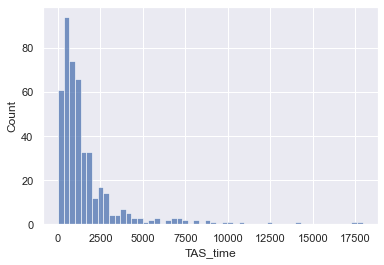

In [52]:
sns.histplot(data=df,x='TAS_time')

In [53]:
print('WR times (in seconds) repartition :')
df.time.describe()

WR times (in seconds) repartition :


count      457.000000
mean      2193.178685
std       2811.401216
min          9.487000
25%        664.833000
50%       1226.000000
75%       2315.000000
max      21790.000000
Name: time, dtype: float64

<AxesSubplot:xlabel='time', ylabel='Count'>

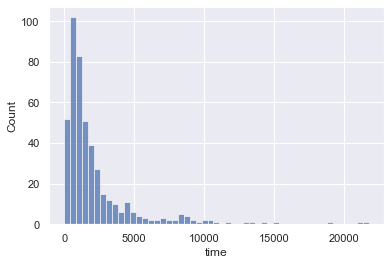

In [54]:
sns.histplot(data=df,x='time')

In [55]:
print('time difference (in seconds) repartition :')
df.time_difference.describe()

time difference (in seconds) repartition :


count      457.000000
mean       551.698046
std       1239.252559
min          0.610000
25%         55.850000
50%        163.720000
75%        443.430000
max      14035.720000
Name: time_difference, dtype: float64

<AxesSubplot:xlabel='time_difference', ylabel='Count'>

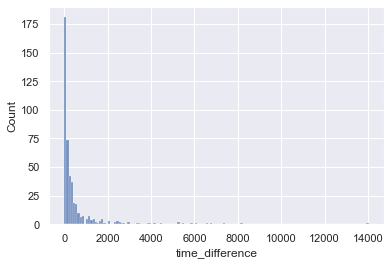

In [56]:
sns.histplot(data=df,x='time_difference')

In [57]:
print('% of time difference repartition :')
df['%_of_difference'].describe()

% of time difference repartition :


count    457.000000
mean      20.053001
std       19.934836
min        0.208191
25%        6.704855
50%       13.069767
75%       23.998340
max       99.749462
Name: %_of_difference, dtype: float64

<AxesSubplot:xlabel='%_of_difference', ylabel='Count'>

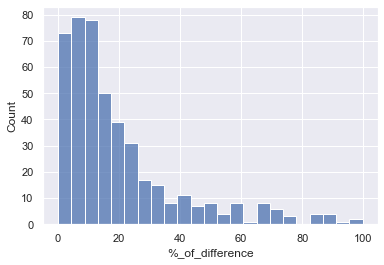

In [58]:
sns.histplot(data=df,x='%_of_difference')

<AxesSubplot:xlabel='%_of_difference', ylabel='Count'>

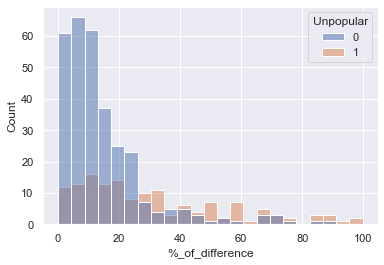

In [72]:
sns.histplot(data=df,x='%_of_difference',hue='Unpopular')

<AxesSubplot:xlabel='%_of_difference', ylabel='Count'>

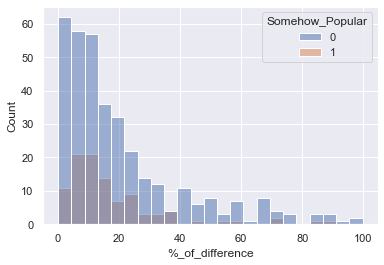

In [73]:
sns.histplot(data=df,x='%_of_difference',hue='Somehow_Popular')

<AxesSubplot:xlabel='%_of_difference', ylabel='Count'>

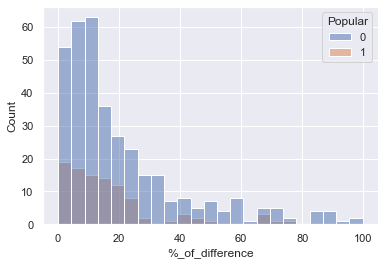

In [74]:
sns.histplot(data=df,x='%_of_difference',hue='Popular')

<AxesSubplot:xlabel='%_of_difference', ylabel='Count'>

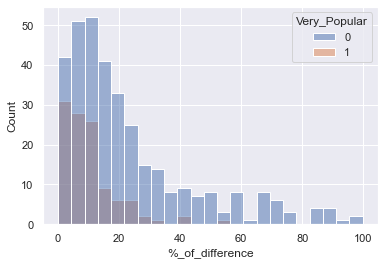

In [75]:
sns.histplot(data=df,x='%_of_difference',hue='Very_Popular')

In [59]:
print('Game ages (in years) repartition :')
df['age'].describe()

Game ages (in years) repartition :


count    458.000000
mean      25.807860
std        7.388721
min        1.000000
25%       21.000000
50%       28.000000
75%       31.000000
max       39.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

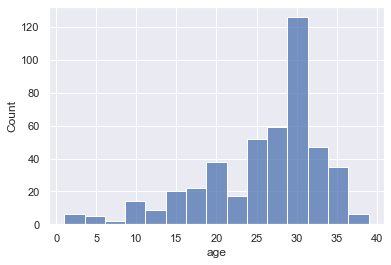

In [60]:
sns.histplot(data=df,x='age')

In [62]:
df['main_platform'].describe()

count                               457
unique                               34
top       Nintendo Entertainment System
freq                                143
Name: main_platform, dtype: object

<AxesSubplot:>

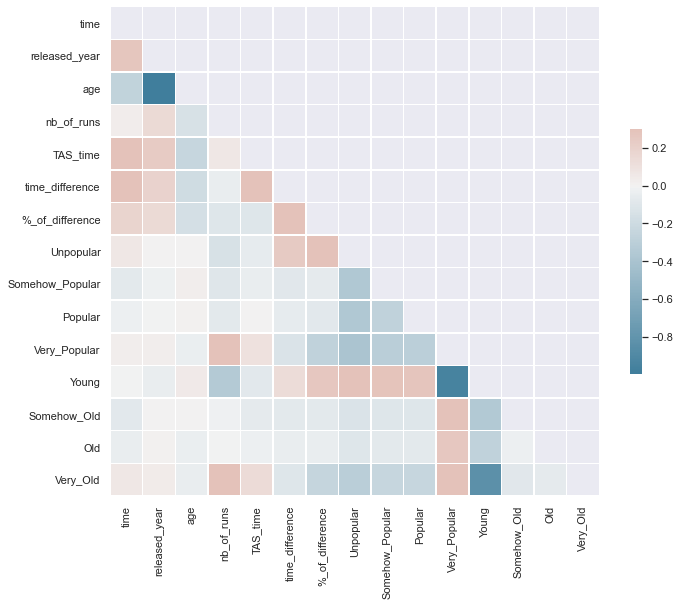

In [76]:
#  Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

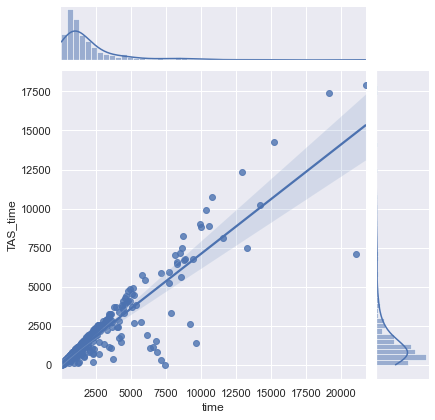

In [79]:
sns.jointplot(x="time", y="TAS_time", data=df, kind='reg')

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

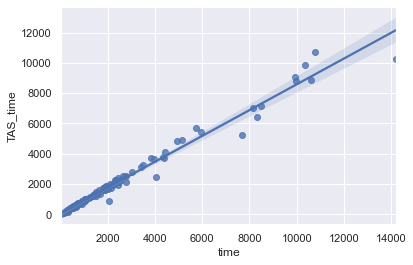

In [95]:
sns.regplot(x=df[df['Very_Popular'] == 1]['time'], y=df[df['Very_Popular'] == 1]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

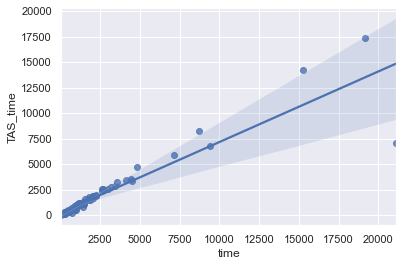

In [96]:
sns.regplot(x=df[df['Popular'] == 1]['time'], y=df[df['Popular'] == 1]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

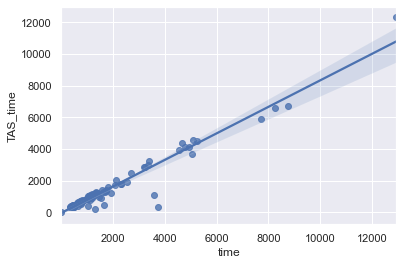

In [97]:
sns.regplot(x=df[df['Somehow_Popular'] == 1]['time'], y=df[df['Somehow_Popular'] == 1]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

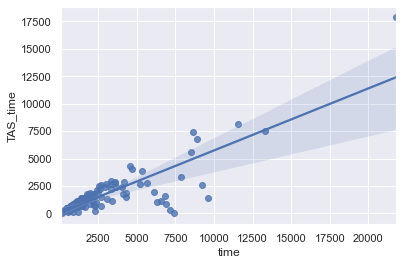

In [98]:
sns.regplot(x=df[df['Unpopular'] == 1]['time'], y=df[df['Unpopular'] == 1]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

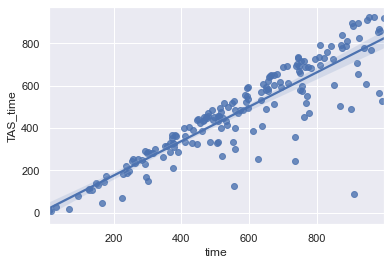

In [104]:
sns.regplot(x=df[df['time'] < 1000]['time'], y=df[df['time'] < 1000]['TAS_time'])

It seems separating short games from longer ones will allow us to make better predictions.

In [105]:
df['time'].describe()

count      457.000000
mean      2193.178685
std       2811.401216
min          9.487000
25%        664.833000
50%       1226.000000
75%       2315.000000
max      21790.000000
Name: time, dtype: float64

In [106]:
#coding time to a categorical variable
df['Short'] = df['time'].apply(lambda x: 1 if x<=664.833 else 0)
df['Somehow_Long'] = df['time'].apply(lambda x: 1 if x>664.833 and x<=1226 else 0)
df['Long'] = df['nb_of_runs'].apply(lambda x: 1 if x>1226 and x<=2315 else 0)
df['Very_Long'] = df['nb_of_runs'].apply(lambda x: 1 if x>2315 else 0)

df

,game,category,game+category,time,released_year,age,nb_of_runs,main_platform,main_genre,engine,...,Popular,Very_Popular,Young,Somehow_Old,Old,Very_Old,Short,Somehow_Long,Long,Very_Long
0,X-Men 2: Clone Wars,Any%,X-Men 2: Clone Wars - Any%,1251.0,1995,26,12,Sega Genesis,Platformer,NaN,...,1,0,1,0,0,0,0,0,0,0
1,Kao the Kangaroo,Any%,Kao the Kangaroo - Any%,1517.0,2000,21,2,Dreamcast,3D Platformer,NaN,...,0,0,1,0,0,0,0,0,0,0
2,Mario & Luigi: Superstar Saga,Any%,Mario & Luigi: Superstar Saga - Any%,4436.0,2003,18,11,Game Boy Advance,NaN,NaN,...,1,0,1,0,0,0,0,0,0,0
3,Black Castle,Any%,Black Castle - Any%,512.0,2020,1,3,Game Boy Color,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
4,Sonic 3 & Knuckles,Sonic,Sonic 3 & Knuckles - Sonic,1797.0,1994,27,41,GameCube,Action,NaN,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Legacy of the Wizard,Any%,Legacy of the Wizard - Any%,1399.0,1987,34,17,Nintendo Entertainment System,NaN,NaN,...,1,0,1,0,0,0,0,0,0,0
454,Wizards & Warriors,Any%,Wizards & Warriors - Any%,657.0,1987,34,33,Nintendo Entertainment System,NaN,NaN,...,0,1,0,0,0,1,1,0,0,0
455,Totally Rad,Any%,Totally Rad - Any%,848.0,1991,30,4,Nintendo Entertainment System,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
456,Dragon Fighter,Any%,Dragon Fighter - Any%,808.0,1990,31,9,Nintendo Entertainment System,NaN,NaN,...,1,0,1,0,0,0,0,1,0,0


<AxesSubplot:xlabel='time', ylabel='TAS_time'>

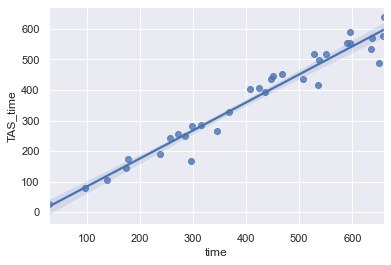

In [111]:
sns.regplot(x=df[ (df['Very_Popular'] == 1) & (df['Short'] == 1) ]['time'], y=df[ (df['Very_Popular'] == 1) & (df['Short'] == 1) ]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

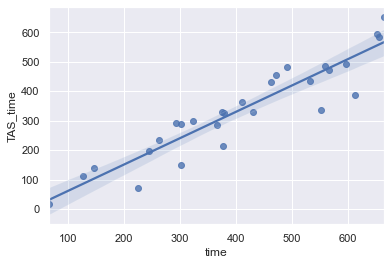

In [112]:
sns.regplot(x=df[ (df['Popular'] == 1) & (df['Short'] == 1) ]['time'], y=df[ (df['Popular'] == 1) & (df['Short'] == 1) ]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

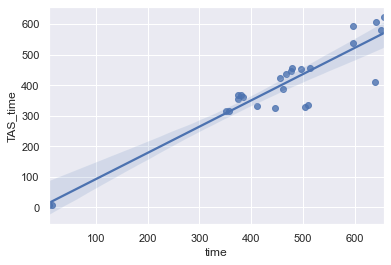

In [113]:
sns.regplot(x=df[ (df['Somehow_Popular'] == 1) & (df['Short'] == 1) ]['time'], y=df[ (df['Somehow_Popular'] == 1) & (df['Short'] == 1) ]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

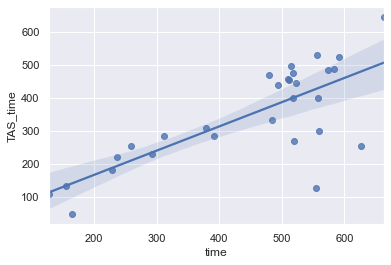

In [114]:
sns.regplot(x=df[ (df['Unpopular'] == 1) & (df['Short'] == 1) ]['time'], y=df[ (df['Unpopular'] == 1) & (df['Short'] == 1) ]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

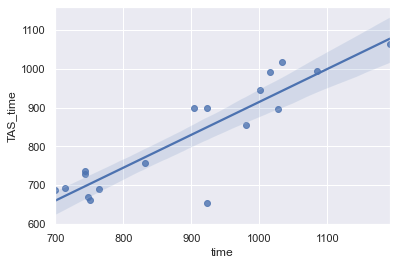

In [115]:
sns.regplot(x=df[ (df['Very_Popular'] == 1) & (df['Somehow_Long'] == 1) ]['time'], y=df[ (df['Very_Popular'] == 1) & (df['Somehow_Long'] == 1) ]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

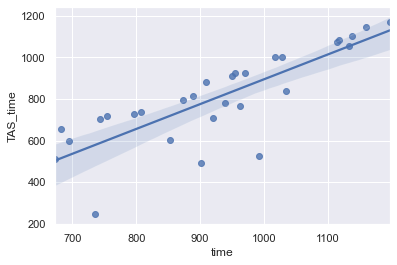

In [116]:
sns.regplot(x=df[ (df['Popular'] == 1) & (df['Somehow_Long'] == 1) ]['time'], y=df[ (df['Popular'] == 1) & (df['Somehow_Long'] == 1) ]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

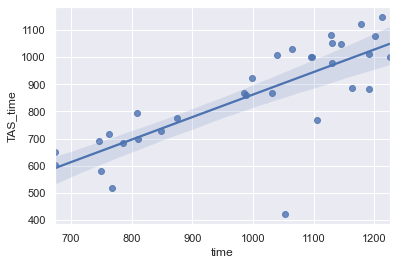

In [117]:
sns.regplot(x=df[ (df['Somehow_Popular'] == 1) & (df['Somehow_Long'] == 1) ]['time'], y=df[ (df['Somehow_Popular'] == 1) & (df['Somehow_Long'] == 1) ]['TAS_time'])

<AxesSubplot:xlabel='time', ylabel='TAS_time'>

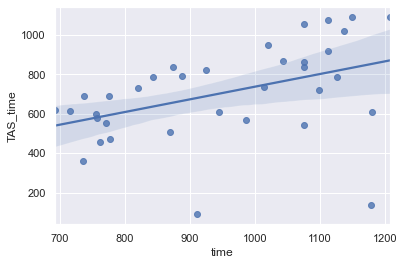

In [118]:
sns.regplot(x=df[ (df['Unpopular'] == 1) & (df['Somehow_Long'] == 1) ]['time'], y=df[ (df['Unpopular'] == 1) & (df['Somehow_Long'] == 1) ]['TAS_time'])

In [127]:
df.to_csv("../data/f_dataset.csv")